In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt

sys.path.append(os.path.join('..'))

from FACT.helper import *
from FACT.fairness import *
from FACT.data_util import *
from FACT.plot import *
from FACT.lin_opt import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


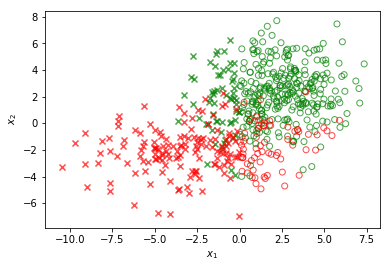

In [3]:
# Biased Data
X_train, y_train, X_test, y_test, X_train_removed, X_test_removed, dtypes, dtypes_, sens_idc, race_idx, sex_idx = get_dataset('synth2', corr_sens=True)
plot_synth_data(X_train_removed, y_train, X_train[:,2])

In [4]:
clf = sklearn.linear_model.LogisticRegression(solver='lbfgs')
clf.fit(X_train_removed, y_train)
print(clf.score(X_test_removed, y_test))

0.8666666666666667


In [4]:
# Biased
fm = FairnessMeasures(X_train, y_train, X_test, y_test, X_train_removed, X_test_removed, clf, 2)
mats, mats_dict, M_const, b_const = get_fairness_mats(fm)
print(mats_dict.keys())
print(fm.pos_group_stats['TPR'], fm.neg_group_stats['TPR'])
print(fm.pos_group_stats['FPR'], fm.neg_group_stats['FPR'])
print(b_const[1] / b_const[0], b_const[3] / b_const[2])
print(fm.FOR, fm.PPV)

dict_keys(['EqOdd', 'PredEqual', 'Calibration', 'DemoParity', 'NegClassBal', 'PosClassBal', 'ClassBal', 'EqOpp'])
0.9354838709677419 0.6818181818181818
0.4642857142857143 0.06060606060606061
[0.81578947] [0.25]
0.16304347826086957 0.8851351351351351


In [6]:
fm.pos_base_rate, fm.neg_base_rate

(0.8157894736842105, 0.25)

In [7]:
fm.group_parity_diff(), fm.pos_class_balance(), fm.neg_class_balance()

(0.6327751196172249,
 (0.8761290322580644, 0.630909090909091),
 (0.4685714285714285, 0.11863636363636365))

In [8]:
fm.equalized_odds()

((0.9354838709677419, 0.6818181818181818),
 (0.4642857142857143, 0.06060606060606061))

In [8]:
result = test_all_enumerations(fm, mats)

['EqOdd', 'Calibration']	False	None
['EqOdd', 'PosClassBal']	True	0.6083283885569362
['EqOdd', 'NegClassBal']	True	0.6083309829912471
['EqOdd', 'ClassBal']	True	0.6083283885568447
['EqOdd', 'PredEqual']	True	0.6083309829912369
['EqOdd', 'EqOpp']	True	0.6083309829912372
['EqOdd', 'DemoParity']	True	0.6083298909220071
['Calibration', 'PosClassBal']	False	None
['Calibration', 'NegClassBal']	False	None
['Calibration', 'ClassBal']	False	None
['Calibration', 'PredEqual']	False	None
['Calibration', 'EqOpp']	False	None
['Calibration', 'DemoParity']	False	None
['PosClassBal', 'NegClassBal']	True	0.0
['PosClassBal', 'ClassBal']	True	0.0
['PosClassBal', 'PredEqual']	True	0.0
['PosClassBal', 'EqOpp']	True	0.6083283885567785
['PosClassBal', 'DemoParity']	True	0.20745362855607172
['NegClassBal', 'ClassBal']	True	0.0
['NegClassBal', 'PredEqual']	True	0.0
['NegClassBal', 'EqOpp']	True	0.6083309829912327
['NegClassBal', 'DemoParity']	True	0.35832745588916093
['ClassBal', 'PredEqual']	True	0.0
['ClassBa

['PosClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.6083293555169019
['NegClassBal', 'ClassBal', 'PredEqual', 'EqOpp']	True	0.6083283885569003
['NegClassBal', 'ClassBal', 'PredEqual', 'DemoParity']	True	0.3916649715378567
['NegClassBal', 'ClassBal', 'EqOpp', 'DemoParity']	True	0.6083256944979646
['NegClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.6083305559610271
['ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.6083303887062167
['EqOdd', 'Calibration', 'PosClassBal', 'NegClassBal', 'ClassBal']	False	None
['EqOdd', 'Calibration', 'PosClassBal', 'NegClassBal', 'PredEqual']	False	None
['EqOdd', 'Calibration', 'PosClassBal', 'NegClassBal', 'EqOpp']	False	None
['EqOdd', 'Calibration', 'PosClassBal', 'NegClassBal', 'DemoParity']	False	None
['EqOdd', 'Calibration', 'PosClassBal', 'ClassBal', 'PredEqual']	False	None
['EqOdd', 'Calibration', 'PosClassBal', 'ClassBal', 'EqOpp']	False	None
['EqOdd', 'Calibration', 'PosClassBal', 'ClassBal', 'DemoParity']	False	None
['EqOdd', 

In [7]:
# Get fairness trade-off table from the list of fairness names
some_names = [['PosClassBal', 'ClassBal'], 
              ['PredEqual', 'NegClassBal'],
              ['EqOdd', 'DemoParity'],
              ['EqOdd', 'PosClassBal', 'DemoParity'],
              ['EqOdd', 'ClassBal', 'PredEqual', 'DemoParity'],
              ['EqOdd', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity'],
              ['PosClassBal', 'DemoParity'], 
              ['Calibration', 'ClassBal', 'EqOpp', 'DemoParity'],
              ['PosClassBal', 'NegClassBal', 'Calibration'],
             ]
dd = test_some_names(fm, some_names)
res2text(dd)

['PosClassBal', 'ClassBal']	True	0.0
['PredEqual', 'NegClassBal']	True	0.0
['EqOdd', 'DemoParity']	True	0.6083298909220071
['EqOdd', 'PosClassBal', 'DemoParity']	True	0.6083293555168505
['EqOdd', 'ClassBal', 'PredEqual', 'DemoParity']	True	0.6083256413807268
['EqOdd', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.6083302963107756
['PosClassBal', 'DemoParity']	True	0.20745362855607172
['Calibration', 'ClassBal', 'EqOpp', 'DemoParity']	False	None
['PosClassBal', 'NegClassBal', 'Calibration']	False	None


'PCB, CB &  o  & 1.0000\\ PE, NCB &  o  & 1.0000\\ EOd, DP &  o  & 0.3917\\ EOd, PCB, DP &  o  & 0.3917\\ EOd, CB, PE, DP &  o  & 0.3917\\ EOd, CB, PE, EOp, DP &  o  & 0.3917\\ PCB, DP &  o  & 0.7925\\ CG, CB, EOp, DP &  x  & -\\ PCB, NCB, CG &  x  & -\\ '

Calibration,ClassBal,EqOpp,DemoParity	0.018558252277555188
PosClassBal,NegClassBal,Calibration	0.0017158089856100047


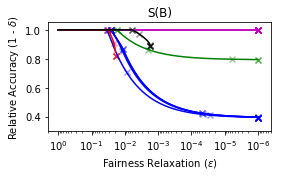

In [25]:
# First get (eps, delta) pairs for optimizing over different lambdas
lmbds_used = get_eps_delta_over_lambdas(mats_dict, M_const, b_const, some_names)

# NOTE manually set up the group for colors
groups = [0, 0, 1, 1, 1, 1, 2, 3, 4]
colors = ['m', 'b', 'g', 'r', 'k']
plot_eps_delta_curves(fm, 
                      some_names, 
                      lmbds_used, 
                      groups=groups, 
                      colors=colors, 
                      data_name='S(B)',
                      save=True)

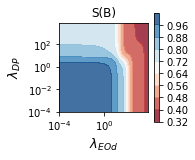

In [7]:
# Multi-dimensional regularization for fairness definitions:
name = ['EqOdd', 'DemoParity']
a, b = plot_accuracy_contours(mats_dict, 
                       name, 
                       M_const, 
                       b_const, 
                       bound=(4,4),
                       data_name='S(B)',
                       save=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cdc262208>,
      dtype=object)

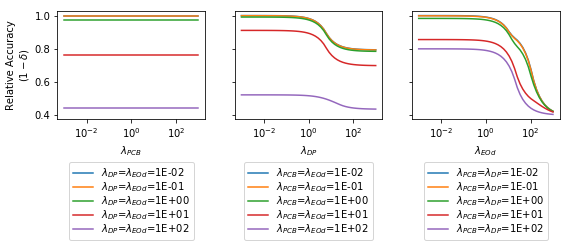

In [9]:
## Slices 
# NOTE place in the order of adding to the rest.
list_name = ['PosClassBal', 'DemoParity', 'EqOdd']
plot_slices(mats_dict, list_name, M_const, b_const, save=True, data_name='SB')